In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df = df.dropna()


In [6]:
x = pd.get_dummies(df.drop("species",axis = 1),drop_first = True)
y = df["species"]

In [7]:
from sklearn.model_selection import train_test_split ,GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x ,y,test_size = 0.3 , random_state = 42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix ,classification_report,ConfusionMatrixDisplay



rfc = RandomForestClassifier(n_estimators = 10 ,
                             max_features = "sqrt",
                             random_state = 101 )
rfc.fit(x_train ,y_train)
y_preds = rfc.predict(x_test)
rfc.feature_importances_



array([0.301596  , 0.15321749, 0.16621898, 0.15714397, 0.16005581,
       0.0488443 , 0.01105006, 0.00187339])

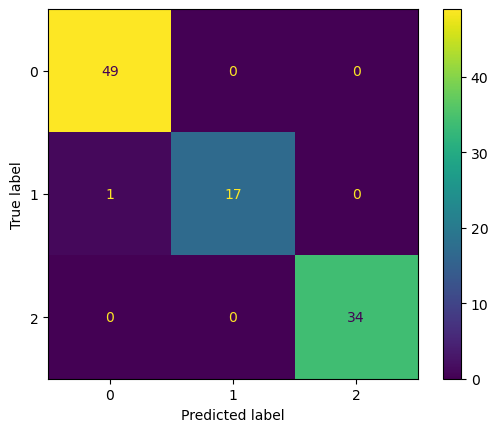

In [18]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds)).plot()

In [19]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        49
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       101
   macro avg       0.99      0.98      0.99       101
weighted avg       0.99      0.99      0.99       101



# 7 - Coding Classification with RandomForestClassifier

In [20]:
df = pd.read_csv("./30930966-data-banknote-authentication.csv")
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


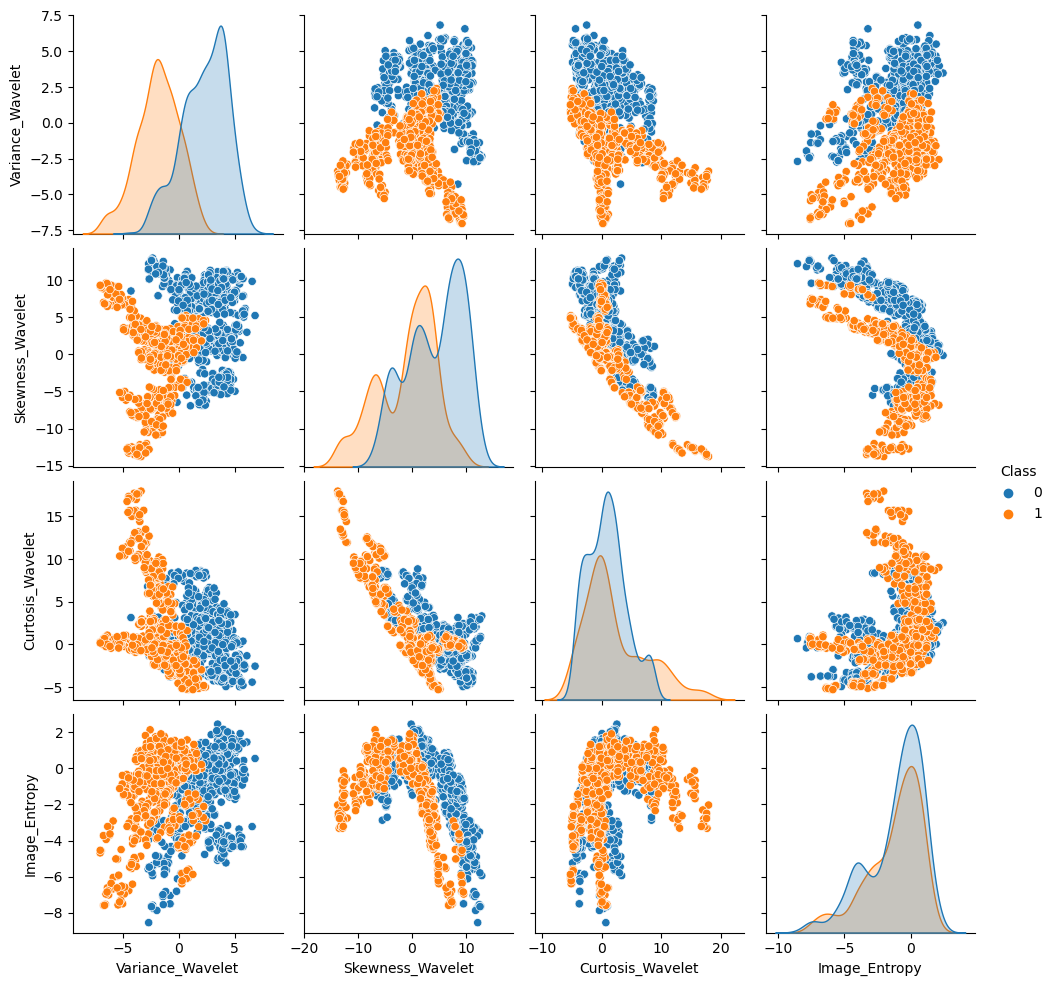

In [22]:
sns.pairplot(data =df ,hue = "Class")

In [23]:
X= df.drop("Class",axis = 1)
y = df["Class"]

In [24]:
from sklearn.model_selection import train_test_split ,GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(X ,y,test_size = 0.15 , random_state = 42)

In [28]:
params_grid = {
    "n_estimators": [64 ,100 ,128 ,200],
    "max_features": [2 ,3 ,4],
    "bootstrap" : [True ,False],
    "oob_score" : [True ,False]
}

In [29]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc ,params_grid)

In [30]:
grid.fit(x_train ,y_train)

C:\Users\Barcha\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Barcha\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Barcha\anaconda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Barcha\anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 417, in fit
    raise ValueError("Out of bag estimation only available if bootstra

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [32]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': True}

In [35]:
rfc1 = RandomForestClassifier(max_features = 2 ,
                             n_estimators = 128,
                             oob_score = True)

In [37]:
rfc1.fit(x_train ,y_train)
y_preds = rfc1.predict(x_test)
rfc1.feature_importances_


array([0.55707777, 0.22646336, 0.15730853, 0.05915035])

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       111
           1       0.98      0.98      0.98        95

    accuracy                           0.98       206
   macro avg       0.98      0.98      0.98       206
weighted avg       0.98      0.98      0.98       206



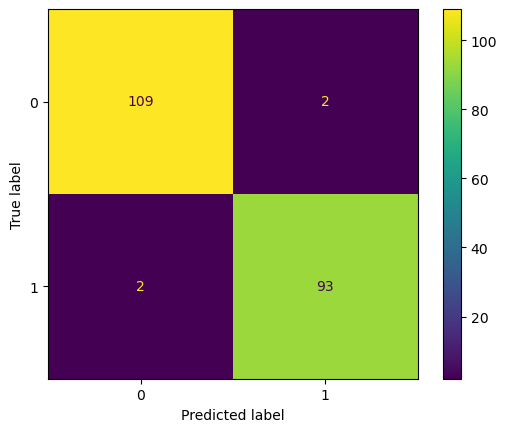

In [45]:
from sklearn.metrics import confusion_matrix ,classification_report,ConfusionMatrixDisplay ,accuracy_score
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds)).plot()
print(classification_report(y_test,y_preds))

In [46]:
error = []
missclassification = []

for n in range(1,200):
    rfc1 = RandomForestClassifier(max_features = 2 ,
                             n_estimators = n)
    rfc1.fit(x_train ,y_train)
    y_preds = rfc1.predict(x_test)
    err = 1 - accuracy_score(y_test ,y_preds)
    missclass = np.sum(y_preds != y_test)
    error.append(err)
    missclassification.append(missclass)
    

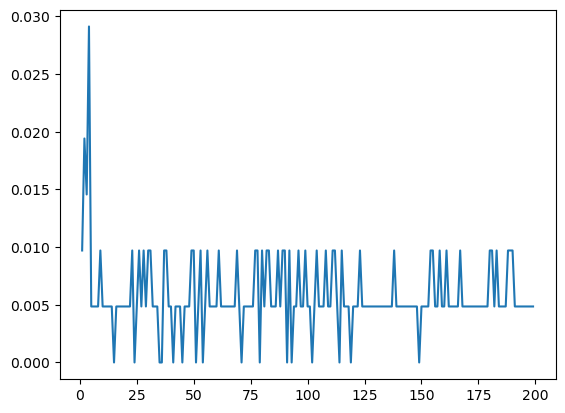

In [48]:
plt.plot(range(1,200),error)

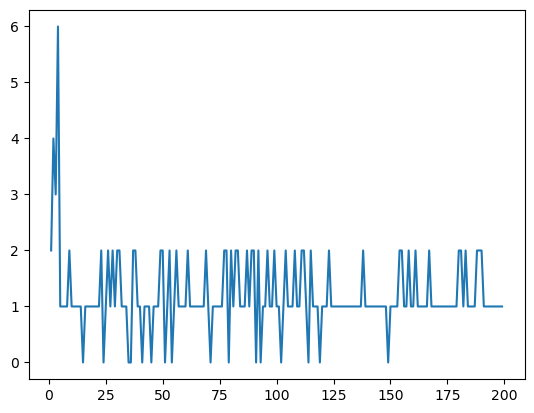

In [49]:
plt.plot(range(1,200),missclassification)